### Student Information
Name:唐文蔚

Student ID:F74102022

GitHub ID:Tang-Webber

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

## Task 2

In [1]:
### Begin Assignment Here

!pip install fsspec huggingface_hub -q

#### Download Data and take a look

In [2]:
# Download Data and take a look
import pandas as pd

X = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")
X


sentiment                                            comment
0     not nostalgia  He was a singer with a golden voice that I lov...
1         nostalgia  The mist beautiful voice ever I listened to hi...
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4         nostalgia  listening to his songs reminds me of my mum wh...
...             ...                                                ...
1495  not nostalgia  i don't know!..but the opening of the video,.....
1496  not nostalgia  it's sad this is such a beautiful song when yo...
1497  not nostalgia  Dear Friend, I think age and time is not that ...
1498      nostalgia  I was born in 1954 and started to be aware of ...
1499      nostalgia  This is the first CD I bought after my marriag...

[1500 rows x 2 columns]

In [3]:
print(len(X))
print(X[0:2])
print()
for t in X["comment"][:2]:
    print(t, "\n")

1500
       sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life. 

The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel 



In [4]:
# add category to the dataframe
X['category'] = X['sentiment'].apply(lambda x: 1 if x == 'nostalgia' else 0)

In [5]:
print(X[X['category'] == 0].iloc[::10][0:5])

        sentiment                                            comment  category
0   not nostalgia  He was a singer with a golden voice that I lov...         0
24  not nostalgia  I like the part I'm a steam roller baby guaran...         0
51  not nostalgia  Someone says it' about a tom girl. That is a p...         0
67  not nostalgia  Tommy, No doubt, its just so weird, has a unbe...         0
89  not nostalgia  I always hear this song at my job and wondered...         0


### Data Mining using Pandas

#### Missing Values

In [6]:
# check missing value
X.isnull().sum()
# No missing Data!

sentiment    0
comment      0
category     0
dtype: int64

#### Duplicate Data


In [7]:
print(X.duplicated().sum())
X[X.duplicated()].index
# Duplicate Data index 78

1


Index([78], dtype='int64')

In [8]:
print(len(X))
X.drop_duplicates(inplace=True) 
print(len(X))

1500
1499


### Data Processing


#### Sampling


In [9]:
X_sample = X.sample(n=500)
len(X_sample)

500

In [10]:
X_sample[0:4]

sentiment                                            comment  \
89   not nostalgia  I always hear this song at my job and wondered...   
574  not nostalgia  "The Naughty Lady of Shady Lane" could well ha...   
522  not nostalgia     The nearest we'll ever get to heaven on earth.   
679  not nostalgia  " Only you have that magic technique, when we ...   

     category  
89          0  
574         0  
522         0  
679         0

sentiment
nostalgia        750
not nostalgia    749
Name: count, dtype: int64


<Axes: title={'center': 'sentiment distribution'}, xlabel='sentiment'>

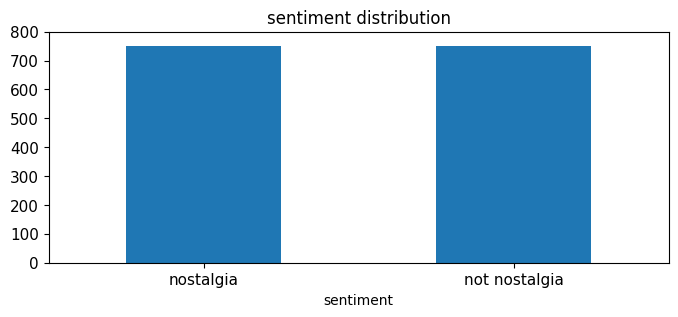

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

print(X.sentiment.value_counts())

# plot barchart for X
X.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'sentiment distribution',
                                    ylim = [0, 800],        
                                    rot = 0, fontsize = 11, figsize = (8,3))


sentiment
not nostalgia    258
nostalgia        242
Name: count, dtype: int64


<Axes: title={'center': 'sentiment distribution'}, xlabel='sentiment'>

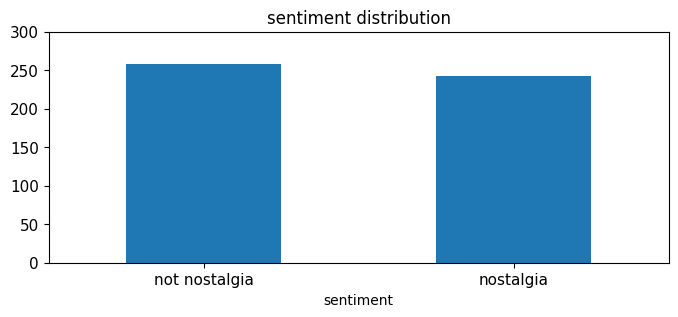

In [12]:
print(X_sample.sentiment.value_counts())

# plot barchart for X
X_sample.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'sentiment distribution',
                                    ylim = [0, 300],        
                                    rot = 0, fontsize = 11, figsize = (8,3))


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

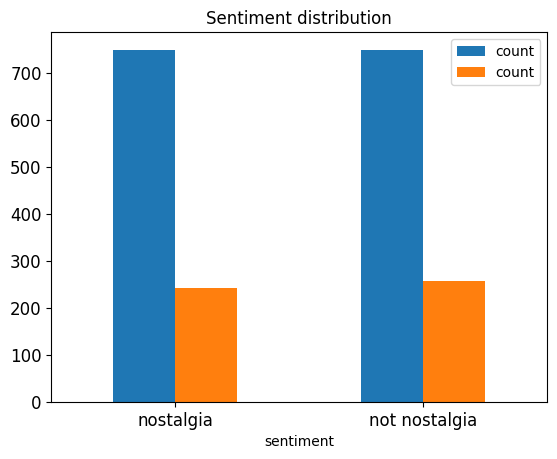

In [13]:
pd.concat([X.sentiment.value_counts().to_frame(), X_sample.sentiment.value_counts().to_frame()], axis=1) \
  .plot(kind = 'bar',title = 'Sentiment distribution', rot = 0, fontsize = 12)

#### Feature Creation


In [14]:
import nltk
nltk.download('punkt_tab')

X['unigrams'] = X['comment'].apply(lambda text: 
    [word for sentence in nltk.sent_tokenize(text, language='english') 
     for word in nltk.word_tokenize(sentence, language='english')]
)

X.head()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\a0916\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


sentiment                                            comment  category  \
0  not nostalgia  He was a singer with a golden voice that I lov...         0   
1      nostalgia  The mist beautiful voice ever I listened to hi...         1   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...         1   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...         0   
4      nostalgia  listening to his songs reminds me of my mum wh...         1   

                                            unigrams  
0  [He, was, a, singer, with, a, golden, voice, t...  
1  [The, mist, beautiful, voice, ever, I, listene...  
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3  [30, day, leave, from, 1st, tour, in, Viet, Na...  
4  [listening, to, his, songs, reminds, me, of, m...

#### Feature subset selection


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

#learn the vocabulary and return document-term matrix
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment)
print(X_counts[0])

  (np.int32(0), np.int32(1598))	1
  (np.int32(0), np.int32(3570))	2
  (np.int32(0), np.int32(2973))	1
  (np.int32(0), np.int32(3650))	1
  (np.int32(0), np.int32(1470))	1
  (np.int32(0), np.int32(3534))	1
  (np.int32(0), np.int32(3282))	1
  (np.int32(0), np.int32(2028))	1
  (np.int32(0), np.int32(3336))	1
  (np.int32(0), np.int32(1606))	1
  (np.int32(0), np.int32(233))	2
  (np.int32(0), np.int32(3284))	3
  (np.int32(0), np.int32(3328))	2
  (np.int32(0), np.int32(1651))	2
  (np.int32(0), np.int32(1512))	1
  (np.int32(0), np.int32(1249))	1
  (np.int32(0), np.int32(323))	1
  (np.int32(0), np.int32(214))	1
  (np.int32(0), np.int32(2341))	1
  (np.int32(0), np.int32(15))	1
  (np.int32(0), np.int32(1733))	1
  (np.int32(0), np.int32(3304))	1
  (np.int32(0), np.int32(907))	1
  (np.int32(0), np.int32(258))	2
  (np.int32(0), np.int32(3124))	1
  (np.int32(0), np.int32(2328))	2
  (np.int32(0), np.int32(245))	1
  (np.int32(0), np.int32(3581))	1
  (np.int32(0), np.int32(1591))	1
  (np.int32(0), np.int

In [16]:
# See some examples
print(f"{X_counts.shape = }")
print(count_vect.get_feature_names_out()[0])
print(count_vect.get_feature_names_out()[23])
print(count_vect.get_feature_names_out()[92])
print(count_vect.get_feature_names_out()[516])

X_counts.shape = (1499, 3730)
00
1950
30s
bought


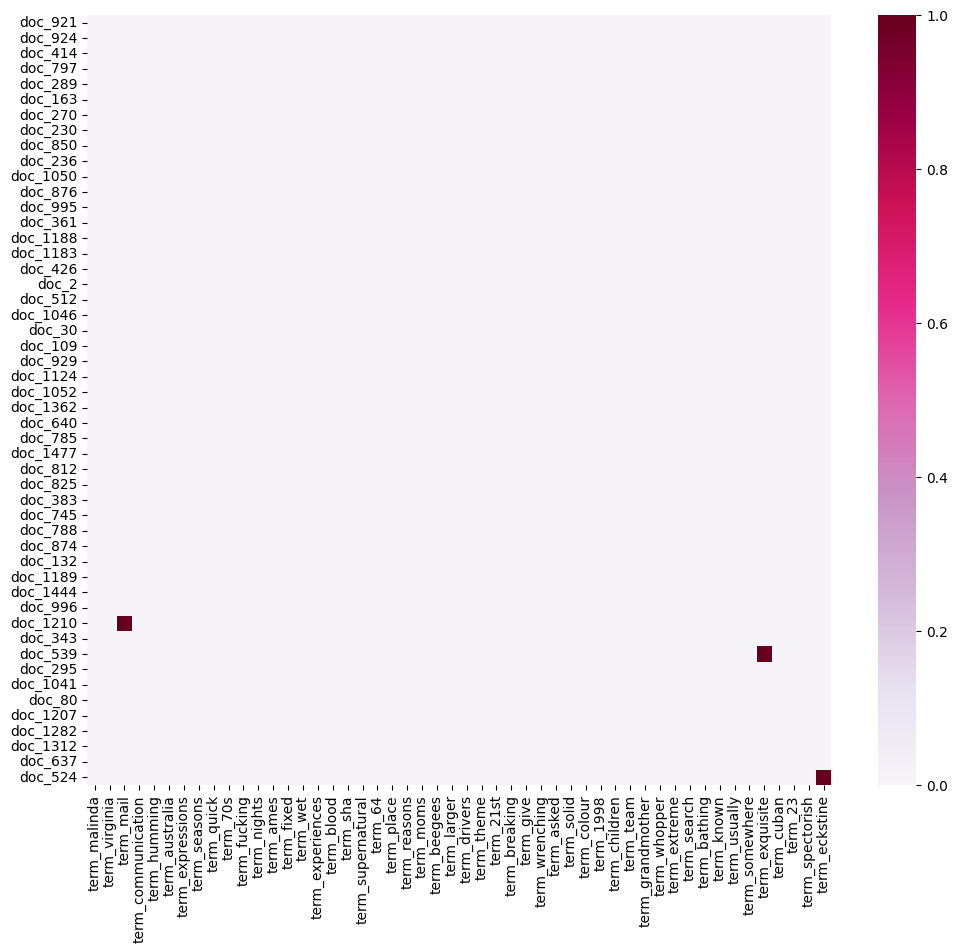

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Visualization
# Randomly sample documents and terms
sampled_docs_indices = np.random.choice(range(X_counts.shape[0]), size=50, replace=False)
sampled_terms_indices = np.random.choice(range(X_counts.shape[1]), size=50, replace=False)

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[sampled_terms_indices]]
plot_y = ["doc_"+ str(i) for i in sampled_docs_indices]
plot_z = X_counts[sampled_docs_indices, :][:, sampled_terms_indices].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(12, 10))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=False)
plt.show()

In [18]:
analyzer = count_vect.build_analyzer()
print(analyzer(X.comment[0]))

['he', 'was', 'singer', 'with', 'golden', 'voice', 'that', 'love', 'to', 'hear', 'all', 'the', 'time', 'was', 'his', 'great', 'fan', 'at', 'the', 'age', 'of', '16years', 'in', 'those', 'days', 'and', 'still', 'now', 'although', 'we', 'have', 'many', 'singers', 'now', 'but', 'can', 'vouch', 'for', 'jim', 'reeves', 'all', 'the', 'time', 'you', 'feel', 'relaxed', 'emotional', 'and', 'loving', 'thank', 'you', 'lord', 'for', 'his', 'life']


#### Attribute Transformation / Aggregation


In [19]:
import numpy as np

term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
    
# Calculate the total occurrence count of each vocabulary in all documents and convert it to a NumPy array  
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0] #sum of first term: 00

np.int64(1)

C:\Users\a0916\AppData\Local\Temp\ipykernel_3756\2340834918.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:100], rotation = 90);


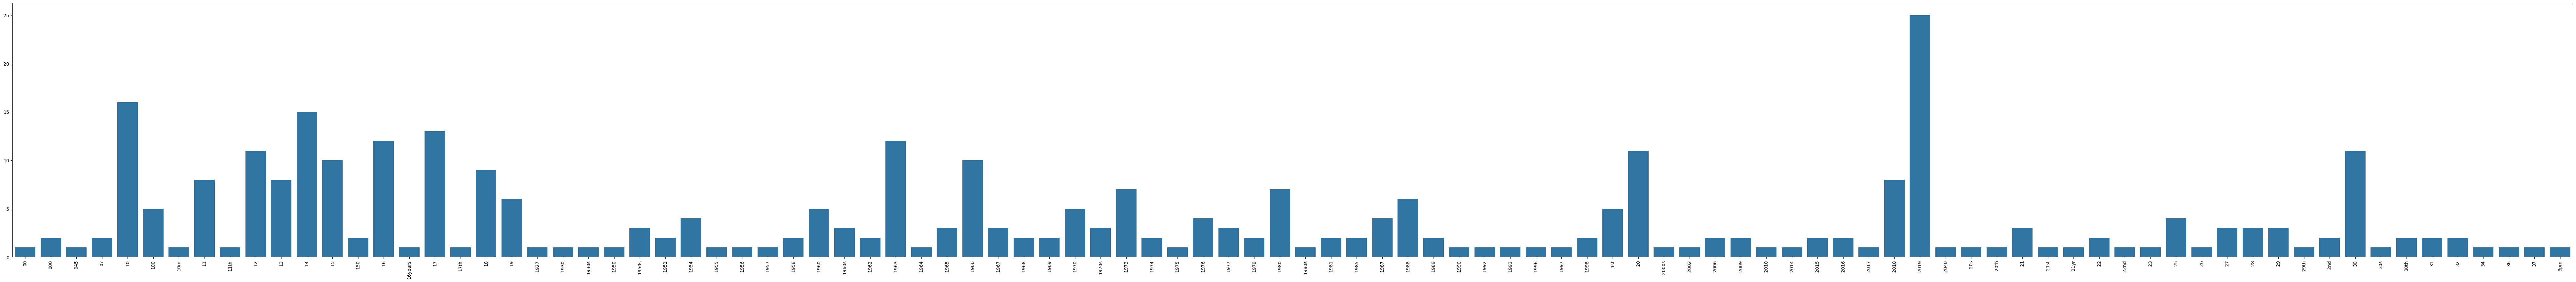

In [20]:
# Plot it 
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:100], 
            y=term_frequencies[:100])
g.set_xticklabels(count_vect.get_feature_names_out()[:100], rotation = 90);

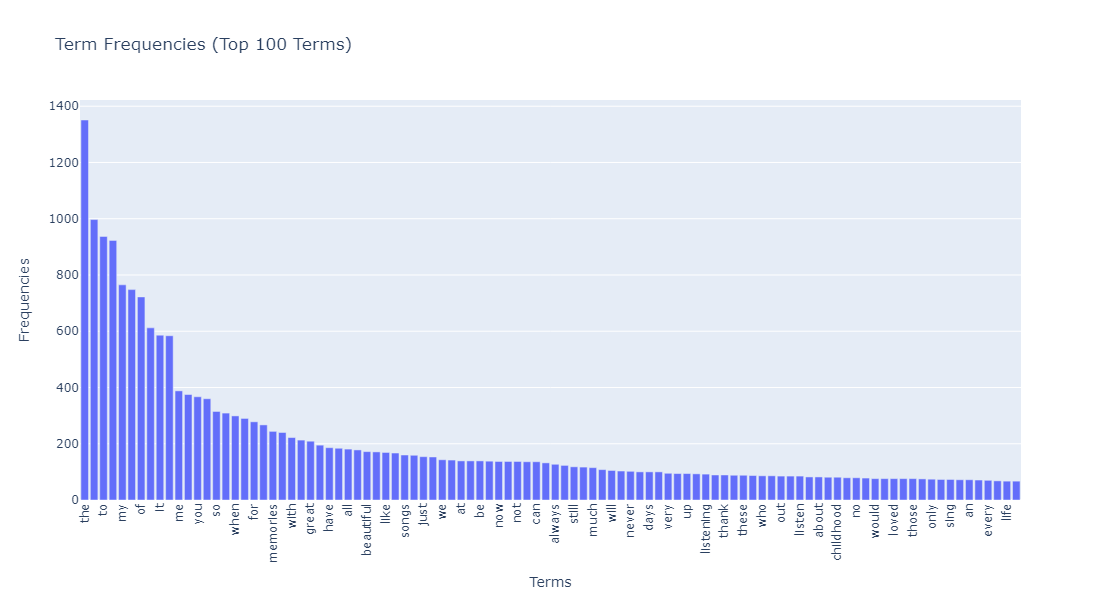

In [21]:
# Plot Long Tail curve
import plotly.express as px

min_freq = 0
max_freq = 1500
term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()
filtered_indices = np.where((term_frequencies >= min_freq) & (term_frequencies <= max_freq))[0]
sorted_indices = filtered_indices[np.argsort(-term_frequencies[filtered_indices])]

# Limit to top N terms
top_n = 100
top_terms_indices = sorted_indices[:top_n]

terms_to_plot = count_vect.get_feature_names_out()[top_terms_indices]
frequencies_to_plot = term_frequencies[top_terms_indices]

fig = px.bar(
    x=terms_to_plot,
    y=frequencies_to_plot,
    labels={'x': 'Terms', 'y': 'Frequencies'},
    title=f"Term Frequencies (Top {top_n} Terms)"
)

fig.update_layout(
    xaxis_tickangle=-90,
    height=600,
    width=1000 
)

fig.show()

C:\Users\a0916\AppData\Local\Temp\ipykernel_3756\3644039667.py:16: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\a0916\AppData\Local\Temp\ipykernel_3756\3644039667.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



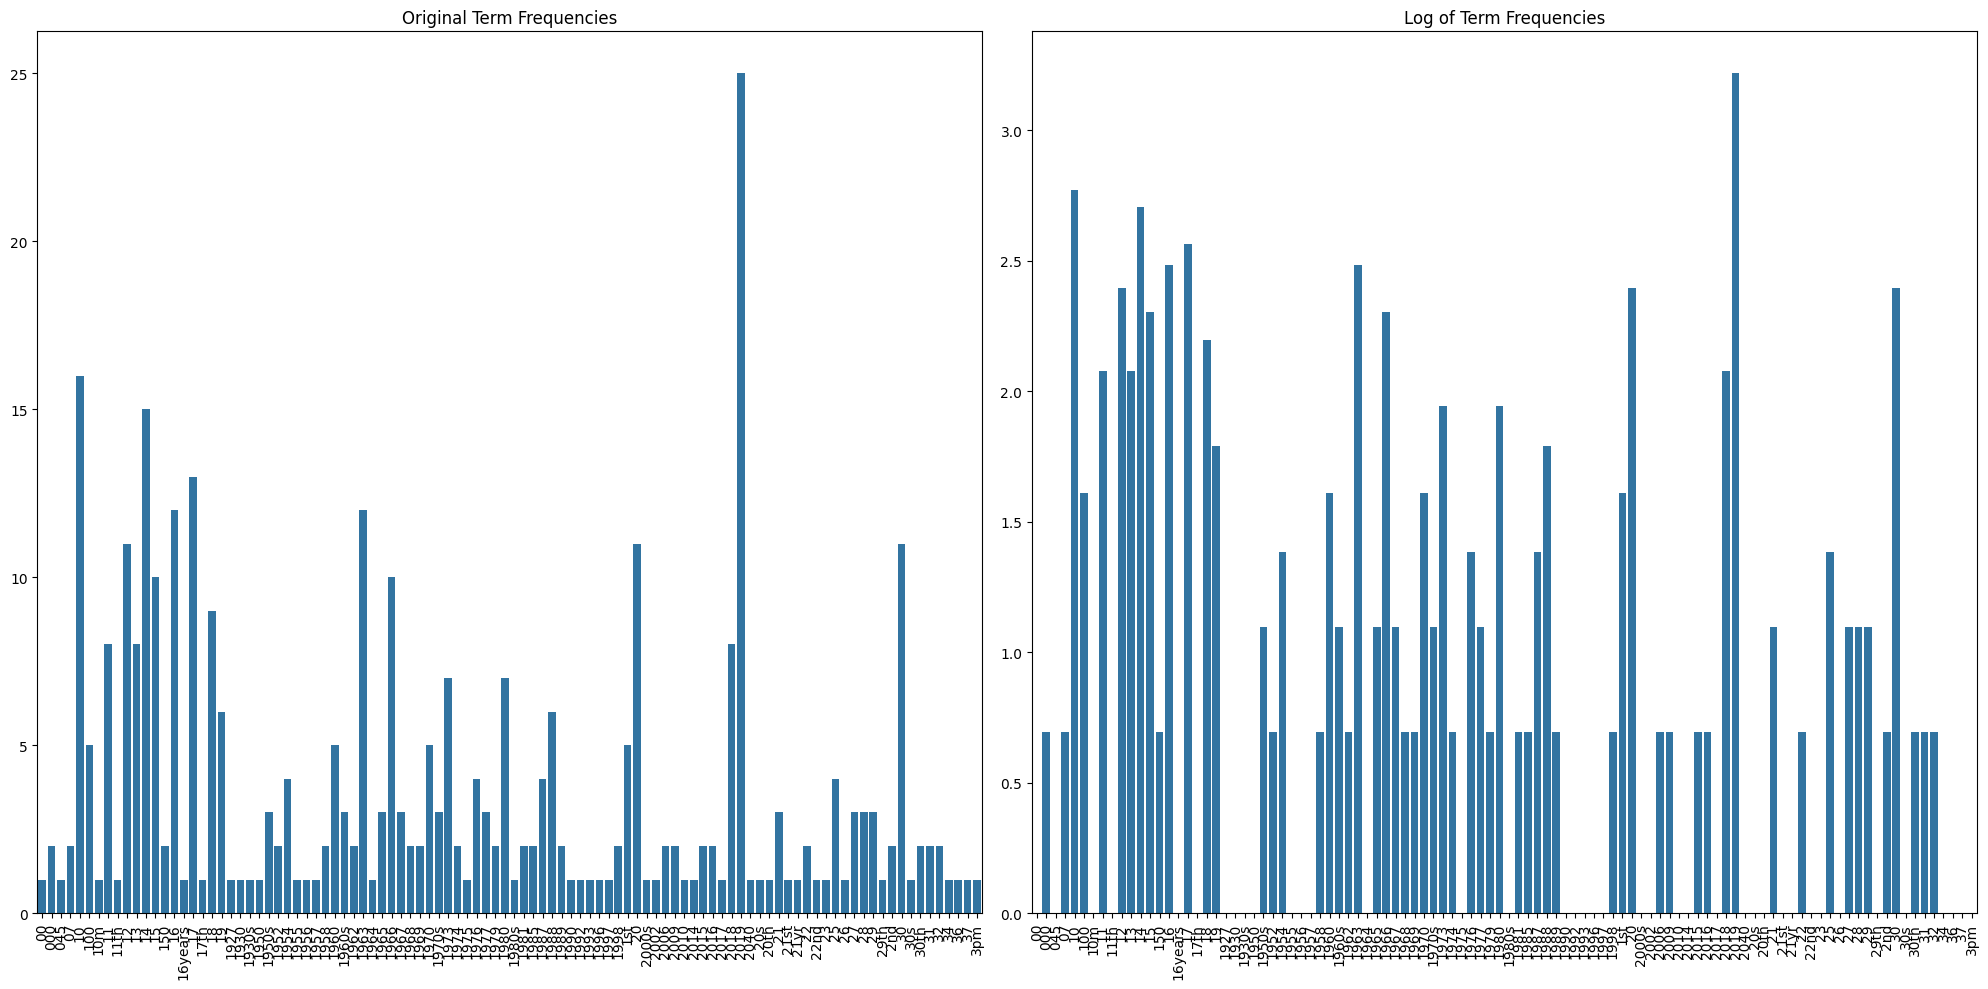

In [22]:
# Compare to log 

import matplotlib.pyplot as plt
import seaborn as sns
import math

# Calculate log of term frequencies
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.figure(figsize=(20, 10))
# First subplot for original term frequencies
plt.subplot(1, 2, 1)
g2 = sns.barplot(x=count_vect.get_feature_names_out()[:100],
                 y=term_frequencies[:100])
g2.set_title('Original Term Frequencies')
g2.set_xticklabels(count_vect.get_feature_names_out()[:100], rotation=90)
# Second subplot for log term frequencies
plt.subplot(1, 2, 2)
g1 = sns.barplot(x=count_vect.get_feature_names_out()[:100],
                 y=term_frequencies_log[:100])
g1.set_title('Log of Term Frequencies')
g1.set_xticklabels(count_vect.get_feature_names_out()[:100], rotation=90)

plt.tight_layout()
plt.show()

#### Finding frequent patterns


In [23]:
# Use sentiment to split data
sentiments = ["not nostalgia", "nostalgia"]
X_split = {sentiment: X[X.sentiment == sentiment] for sentiment in sentiments}
X_split["not nostalgia"].head()

sentiment                                            comment  \
0   not nostalgia  He was a singer with a golden voice that I lov...   
3   not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
8   not nostalgia           Wherever you  are you always in my heart   
9   not nostalgia  Elvis will always be number one no one can com...   
10  not nostalgia  ill bet if they begin to play this song on the...   

    category                                           unigrams  
0          0  [He, was, a, singer, with, a, golden, voice, t...  
3          0  [30, day, leave, from, 1st, tour, in, Viet, Na...  
8          0   [Wherever, you, are, you, always, in, my, heart]  
9          0  [Elvis, will, always, be, number, one, no, one...  
10         0  [ill, bet, if, they, begin, to, play, this, so...

In [24]:
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df.comment)  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
term_document_dfs = {sentiment: create_term_document_df(X_split[sentiment]) for sentiment in sentiments}

In [25]:
# Take a look
term_document_dfs["not nostalgia"]

00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  \
0     0    0    0   0    0    0   0   0   0   0  ...         0           0   
1     0    0    0   0    0    0   0   0   0   0  ...         0           0   
2     0    0    0   0    0    0   0   0   0   0  ...         0           0   
3     0    0    0   0    0    0   0   0   0   0  ...         0           0   
4     0    0    0   0    0    0   0   0   0   0  ...         0           0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...       ...         ...   
744   0    0    0   0    0    0   0   0   0   0  ...         0           0   
745   0    0    0   0    0    0   0   0   0   0  ...         0           0   
746   0    0    0   0    0    0   0   0   0   0  ...         0           0   
747   0    0    0   0    0    0   0   0   0   0  ...         0           0   
748   0    0    0   0    0    0   0   0   0   0  ...         0           0   

     your  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0       0         0      0        0    0    0        0      0  
1       0         0      0        0    0    0        0      0  
2       0         0      0        0    0    0        0      0  
3       0         0      0        0    0    0        0      0  
4       0         0      0        0    0    0        0      0  
..    ...       ...    ...      ...  ...  ...      ...    ...  
744     0         0      0        0    0    0        0      0  
745     0         0      0        0    0    0        0      0  
746     0         0      0        0    0    0        0      0  
747     1         0      0        0    0    0        0      0  
748     0         0      0        0    0    0        0      0  

[749 rows x 2602 columns]

In [26]:
# Take a look
term_document_dfs["nostalgia"]

07  10  11  11th  12  13  14  15  16  17  ...  young  younger  youngster  \
0     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
1     0   0   0     0   0   0   0   0   0   1  ...      0        0          0   
2     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
3     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
4     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
..   ..  ..  ..   ...  ..  ..  ..  ..  ..  ..  ...    ...      ...        ...   
745   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
746   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
747   0   0   0     0   0   1   0   0   0   0  ...      0        0          0   
748   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
749   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   

     your  yours  youth  youthful  youtube  yrs  yup  
0       0      0      0         0        0    0    0  
1       0      0      0         0        0    0    0  
2       0      0      0         0        0    0    0  
3       1      0      0         0        0    0    0  
4       0      0      0         0        0    0    0  
..    ...    ...    ...       ...      ...  ...  ...  
745     0      0      0         0        0    0    1  
746     0      0      0         0        0    0    0  
747     0      0      0         0        0    0    0  
748     0      0      0         0        0    0    0  
749     0      0      0         0        0    0    0  

[750 rows x 2295 columns]

#### Filter bottom  1% & top 5 % words


In [27]:
# Filter the bottom 1% and top 5% words based on their sum across all documents
for sentiment in sentiments:
    print(f'\nFor {sentiment = } we filter the following words:')
    
    term_document_df = term_document_dfs[sentiment]
    
    # Calculate the sum and sort
    word_sums = term_document_df.sum(axis=0).sort_values()
    
    # Remove words
    total_words = len(word_sums)
    top_n = int(0.05 * total_words)
    bottom_n = int(0.01 * total_words)
    words_to_remove = pd.concat([word_sums.head(bottom_n), word_sums.tail(top_n)]).index
    
    print(f'Bottom 1% words: \n{word_sums.head(bottom_n)}')
    print(f'Top 5% words: \n{word_sums.tail(top_n)}')
    
    # Update the DataFrame without the filtered words
    term_document_dfs[sentiment] = term_document_df.drop(columns=words_to_remove)



For sentiment = 'not nostalgia' we filter the following words:
Bottom 1% words: 
12           1
16years      1
zealand      1
sensitive    1
sense        1
xd           1
wwii         1
wuv          1
writers      1
writer       1
wrenching    1
wouldn       1
1998         1
measure      1
spine        1
spewing      1
2040         1
2018         1
2017         1
2010         1
1957         1
1955         1
1952         1
1930s        1
1930         1
17th         1
dtype: int64
Top 5% words: 
first       23
got         23
amazing     23
wish        24
any         25
          ... 
of         361
to         394
and        451
this       452
the        708
Length: 130, dtype: int64

For sentiment = 'nostalgia' we filter the following words:
Bottom 1% words: 
yo         1
yet        1
yester     1
yeas       1
yearn      1
yeah       1
1952       1
1950       1
1969       1
1964       1
lp         1
safety     1
safer      1
saddest    1
seeing     1
lou        1
proud      1
protest   

#### Use FPGrowth algorithm from PAMI to determine the *minimum support* (frequency)


In [28]:
# Transactional Data
from PAMI.extras.DF2DB import DenseFormatDF as db

for sentiment in term_document_dfs:
    obj = db.DenseFormatDF(term_document_dfs[sentiment])
    obj.convert2TransactionalDatabase(f'td_freq_db_{sentiment}.csv', '>=', 1)

Database size (total no of transactions) : 746
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.399463806970509
Maximum Transaction Size : 47
Standard Deviation Transaction Size : 5.940834266064001
Variance in Transaction Sizes : 35.3408856181514
Sparsity : 0.9965660409619908


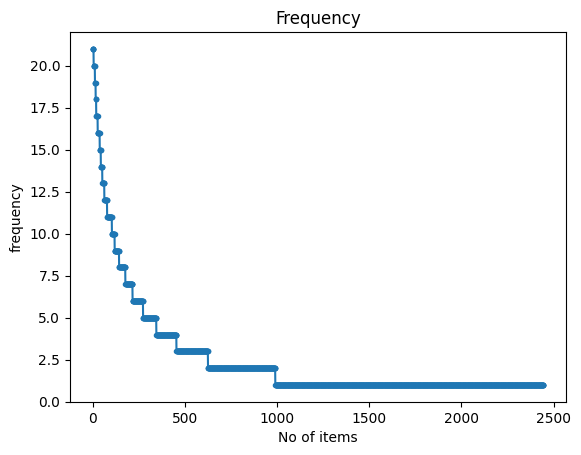

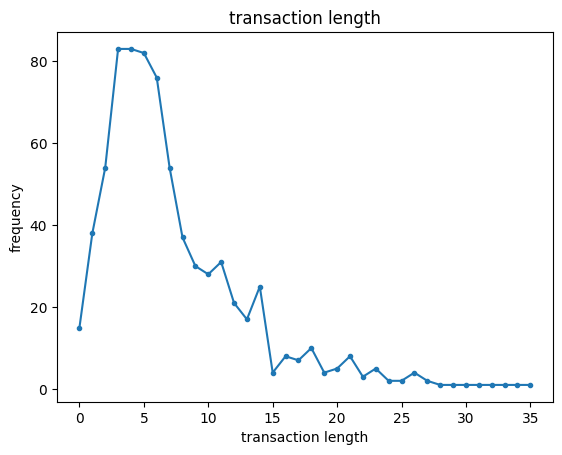

In [29]:
# Print Info
from PAMI.extras.dbStats import TransactionalDatabase as tds

obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.696185286103542
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.20498326251217
Variance in Transaction Sizes : 51.982604800547186
Sparsity : 0.9959721235358483


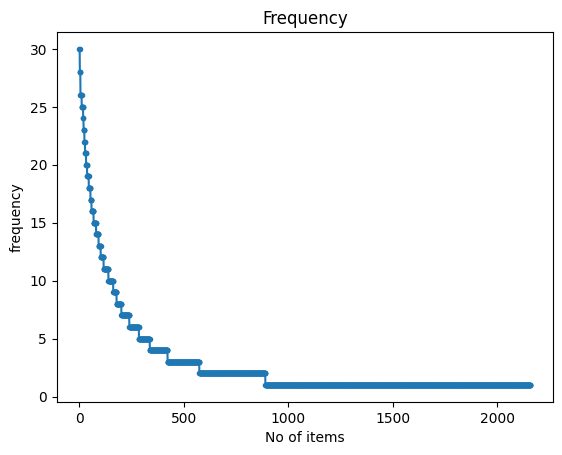

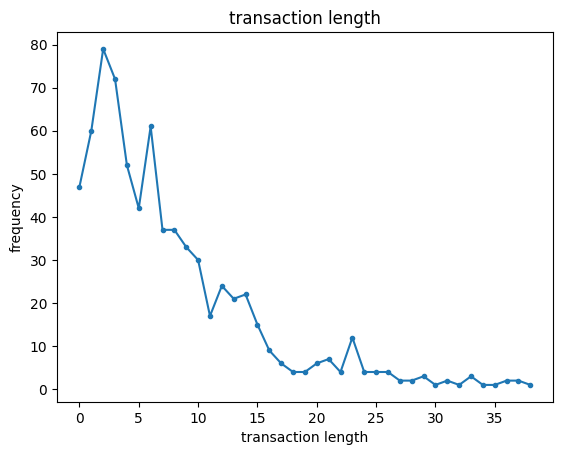

In [30]:
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [31]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup=2
frequentPatternsDF = {}

for sentiment in sentiments:
    obj = alg.FPGrowth(iFile=f'td_freq_db_{sentiment}.csv', minSup=minSup)
    obj.mine()
    frequentPatternsDF[sentiment] = obj.getPatternsAsDataFrame()
    print('Total No of patterns: ' + str(len(frequentPatternsDF[sentiment])))
    print('Runtime: ' + str(obj.getRuntime()))
    obj.save(f'freq_patterns_{sentiment}_minSup{minSup}.txt') #save the patterns
    print(frequentPatternsDF[sentiment])


Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 2113
Runtime: 0.06969094276428223
          Patterns  Support
0             lord        2
1          relaxed        2
2              2nd        2
3         2nd came        2
4            marry        2
...            ...      ...
2108       classic       21
2109          them       21
2110    them every        4
2111        lyrics       21
2112  lyrics every        3

[2113 rows x 2 columns]
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 3745
Runtime: 0.09726309776306152
            Patterns  Support
0             gentle        2
1          gentle no        2
2              jesus        2
3         jesus town        2
4                job        2
...              ...      ...
3740        would go        2
3741              go       28
3742           takes       30
3743  takes favorite        2
3744        favorite       30

#### Unique patterns


In [32]:
import pandas as pd
from collections import Counter

all_patterns = frequentPatternsDF["nostalgia"].Patterns.to_list() + frequentPatternsDF["not nostalgia"].Patterns.to_list()

element_counts = Counter(all_patterns)
unique_patterns = [element for element, count in element_counts.items() if count == 1]
discarded_patterns = [element for element, count in element_counts.items() if count > 1]

total_patterns_count = len(all_patterns)
discarded_patterns_count = len(discarded_patterns)
print(total_patterns_count)
print(discarded_patterns_count)
print(discarded_patterns)

5858
516
['gentle', 'job', 'leave', 'simple', 'touches', 'seen', 'told', 'straight', 'does', 'put', 'face', 'attention', 'beatles', 'work', 'imagine', 'side', 'motown', 'black', 'college', 'guys', 'steve', 'winwood', 'remains', 'listens', 'maybe', 'memorable', 'ask', 'men', 'guess', 'melancholy', 'knows', 'moment', 'less', 'looks', '25', 'gets', 'hello', 'list', 'orbison', 'orbison roy', 'pictures', 'ya', 'style', 'quality', 'superb', 'roll', 'roll rock', 'unbelievable', 'definitely', 'far', 'presley', 'presley elvis', 'loves', 'tried', 'own', 'magic', 'dream', 'realize', 'future', 'spend', 'especially', 'pleasure', 'ruby', 'fan', 'looked', 'brewer', 'teresa', 'whole', 'eckstine', 'eckstine billy', 'green', 'voices', 'experience', 'million', 'try', 'enjoy', 'dickie', 'broken', 'missing', 'garbage', 'davis', 'human', 'film', 'second', 'meaning', 'waiting', 'shame', 'due', 'history', 'women', 'performed', 'wanted', 'totally', 'incredible', 'sometimes', 'perform', 'beat', 'seems', 'change

#### Augment our data


In [33]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  # X['comment'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary
analyzer = count_vect.build_analyzer()

# Tokenize the sentences into sets of unique words
X['tokenized_comment'] = X['comment'].apply(analyzer).apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index = X.index, columns = unique_patterns)

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in unique_patterns:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  wonderful  \
0      0    0    0   0   0    0    0   0     0   0  ...          0   
1      0    0    0   0   0    0    0   0     0   0  ...          0   
2      0    0    0   0   0    0    0   0     0   0  ...          0   
3      0    0    0   0   0    0    0   0     0   0  ...          0   
4      0    0    0   0   0    0    0   0     0   0  ...          0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...        ...   
1495   0    0    0   0   0    0    0   0     0   0  ...          0   
1496   0    0    0   0   0    0    0   0     0   0  ...          0   
1497   0    0    0   0   0    0    0   0     0   0  ...          0   
1498   0    0    0   0   0    0    0   0     0   0  ...          0   
1499   0    0    0   0   0    0    0   0     0   0  ...          0   

      wonderful well  thanks  thanks every  thanks days  thanks lyrics  every  \
0                  0       0             0            0              0      0   
1                  0       0             0            0              0      0   
2                  0       0             0            0              0      0   
3                  0       0             0            0              0      0   
4                  0       0             0            0              0      0   
...              ...     ...           ...          ...            ...    ...   
1495               0       0             0            0              0      0   
1496               0       0             0            0              0      0   
1497               0       0             0            0              0      0   
1498               0       0             0            0              0      0   
1499               0       0             0            0              0      0   

      loved  them every  lyrics every  
0         0           0             0  
1         0           0             0  
2         0           0             0  
3         0           0             0  
4         0           0             0  
...     ...         ...           ...  
1495      0           0             0  
1496      0           0             0  
1497      0           0             0  
1498      0           0             0  
1499      0           0             0  

[1499 rows x 8556 columns]

#### Dimensionality Reduction


In [34]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

print(X_pca_tdm.shape)
print(X_tsne_tdm.shape)
print(X_umap_tdm.shape)

(1499, 2)
(1499, 2)
(1499, 2)


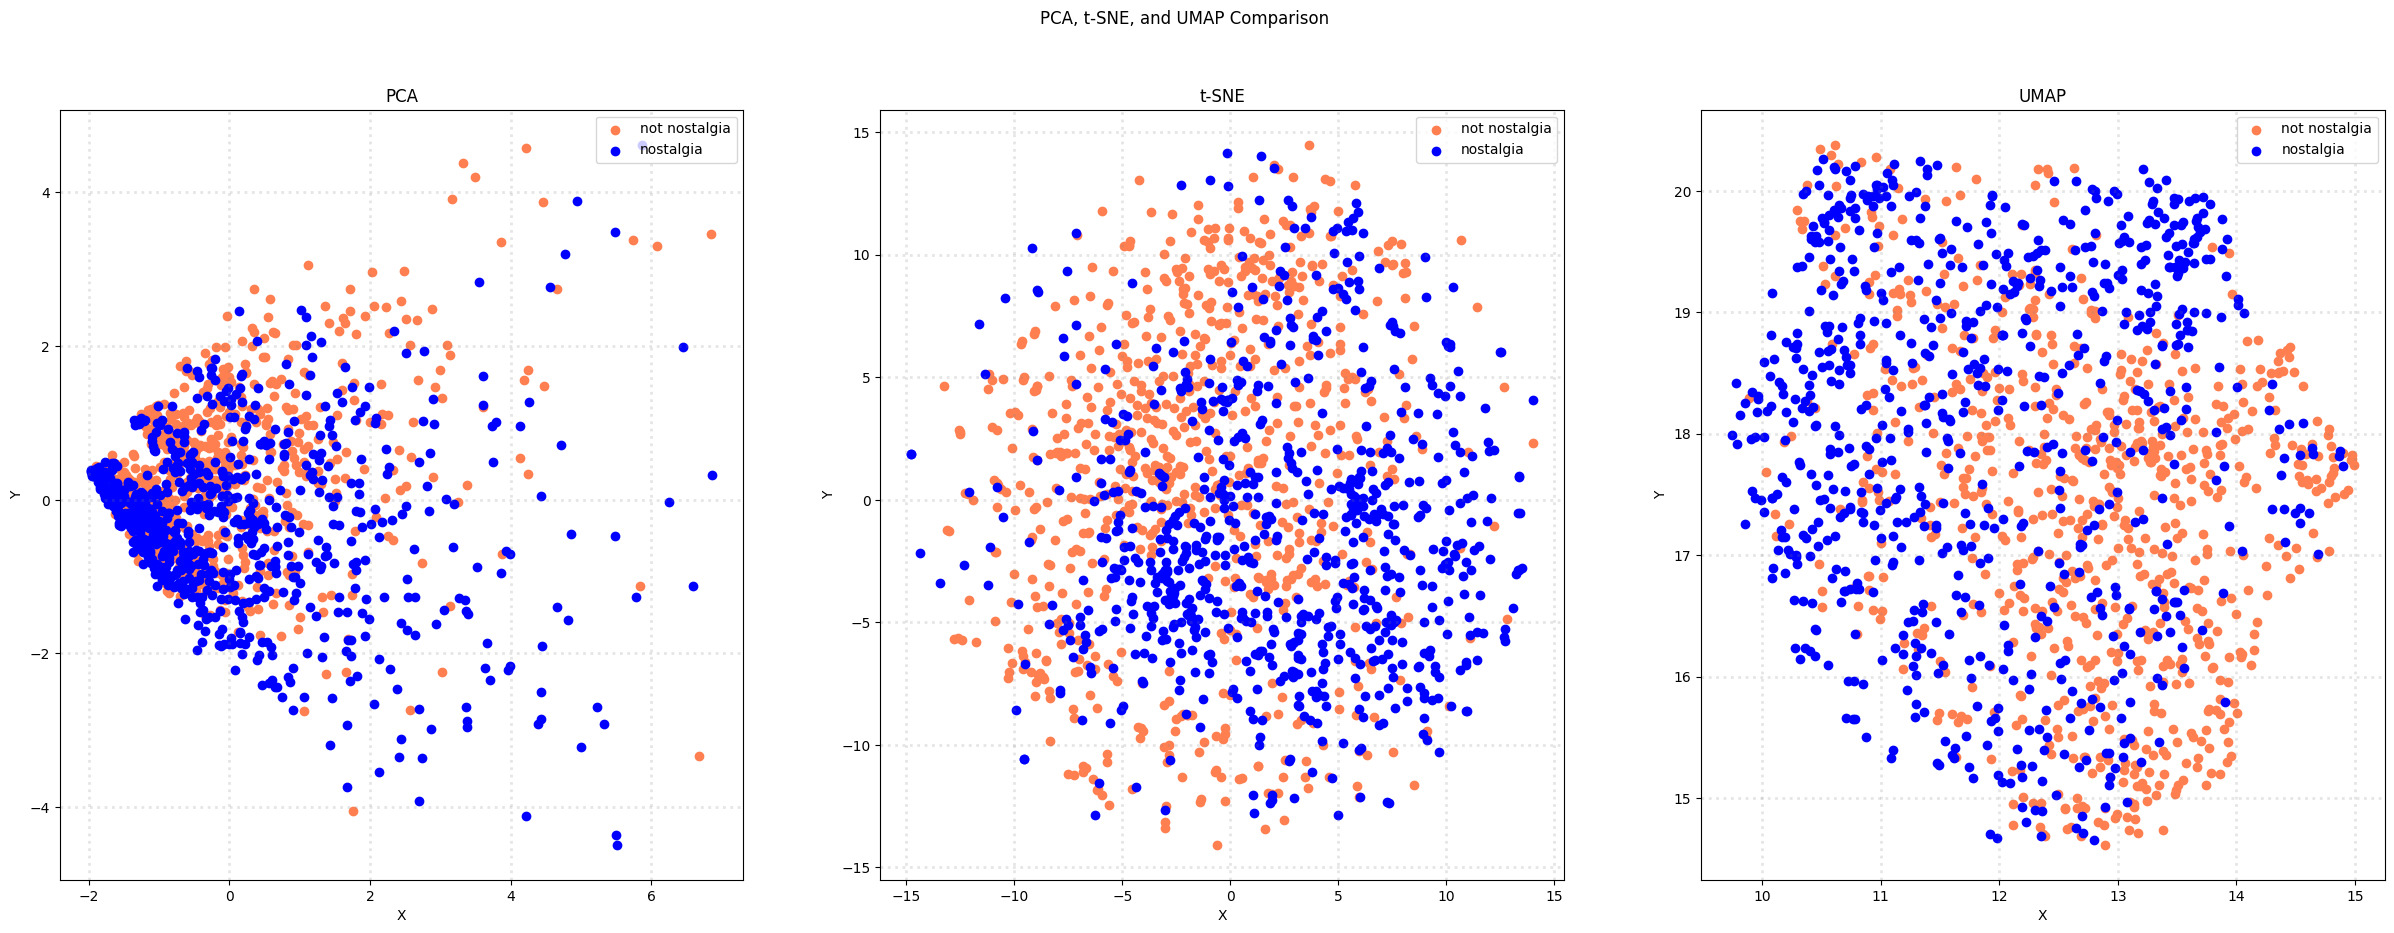

In [35]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [36]:
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

print(X_pca_aug.shape)
print(X_tsne_aug.shape)
print(X_umap_aug.shape)

(1499, 2)
(1499, 2)
(1499, 2)


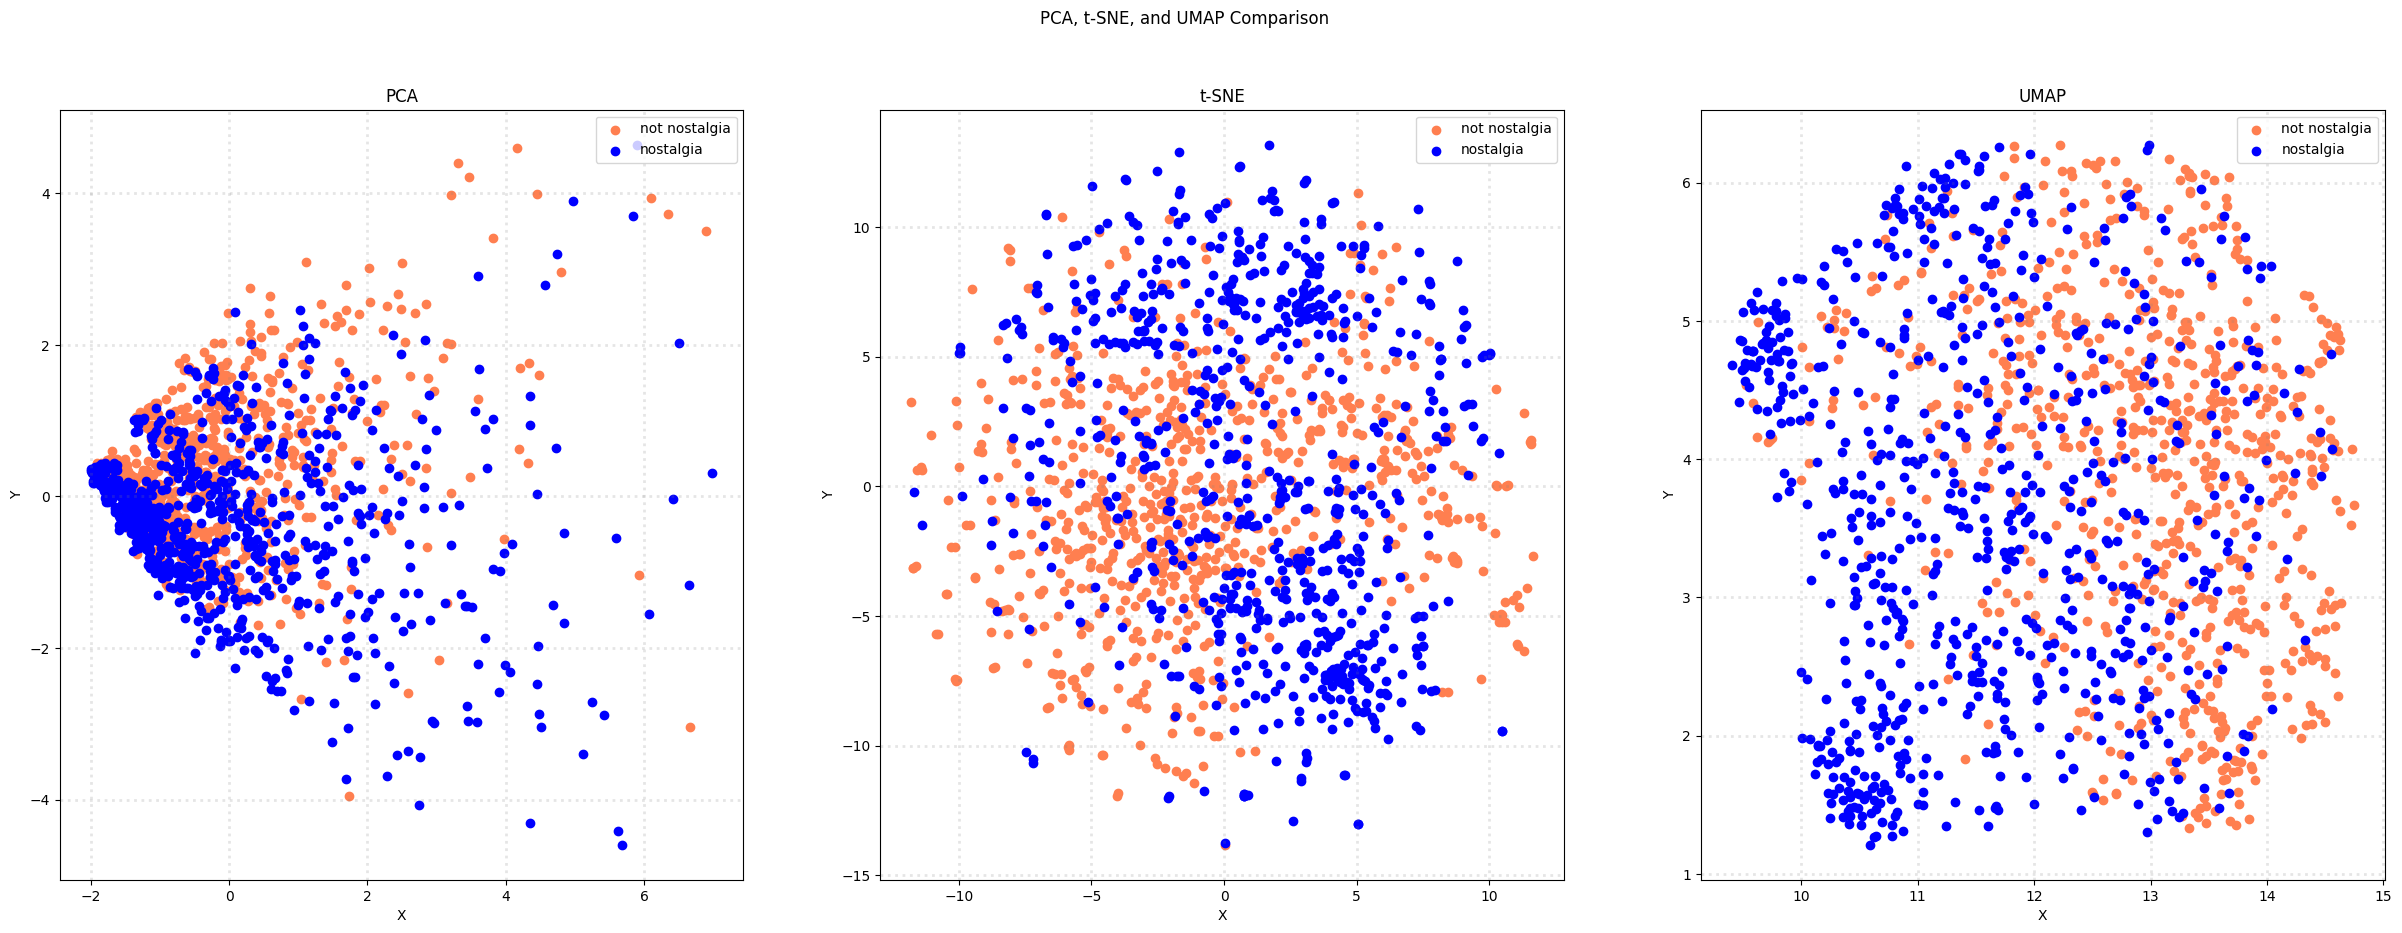

In [37]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

In [38]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA, t-SNE, and UMAP with 3 components
X_pca_tdm_3d = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_tdm_3d = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_tdm_3d = umap.UMAP(n_components=3).fit_transform(tdm_df.values)


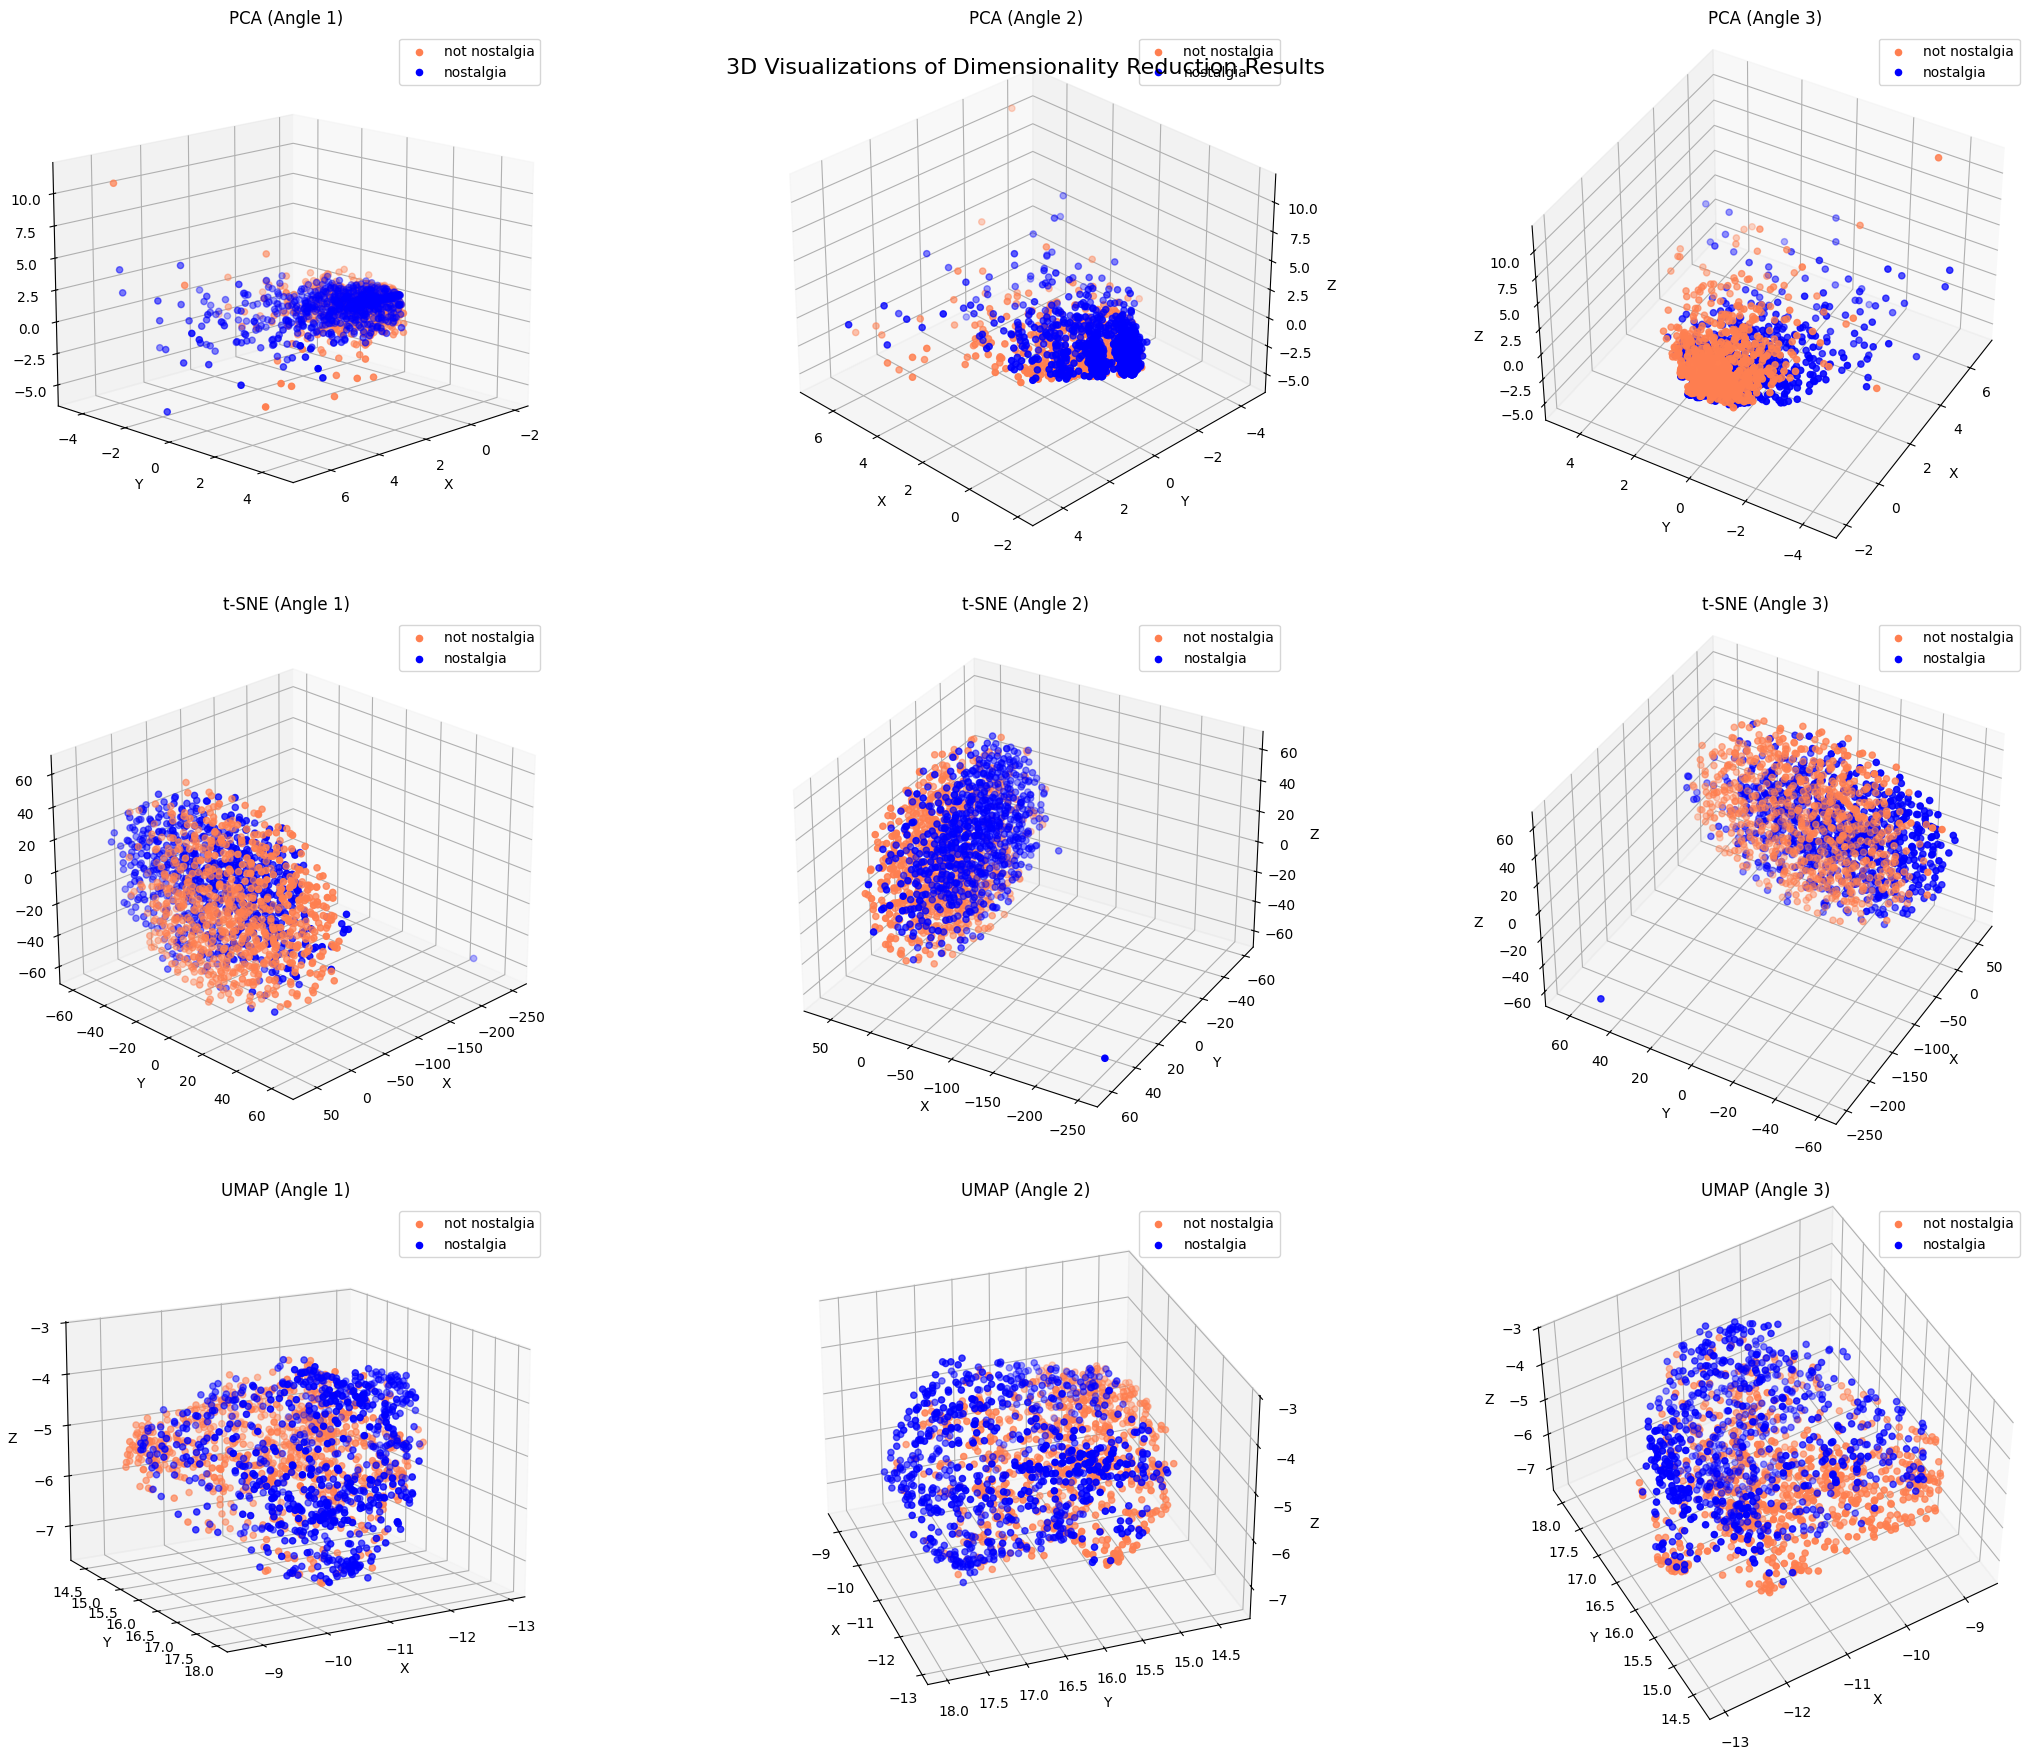

In [39]:
def plot_3d_scatter(ax, X_reduced, title, elev, azim):

    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        zs = X_reduced[X['sentiment'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.grid(True)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=elev, azim=azim)
    ax.legend(loc='upper right')

# Define viewing angles for each method
pca_angles = [(15, 45), (30, 135), (40, 210)]
tsne_angles = [(25, 45), (30, 120), (40, 210)]
umap_angles = [(15, 60), (30, 160), (50, 240)]

# Create the figure
fig = plt.figure(figsize=(24, 18))

# PCA plots
for i, (elev, azim) in enumerate(pca_angles):
    ax = fig.add_subplot(3, 3, i+1, projection='3d')
    plot_3d_scatter(ax, X_pca_tdm_3d, f'PCA (Angle {i+1})', elev, azim)
    
# t-SNE plots
for i, (elev, azim) in enumerate(tsne_angles):
    ax = fig.add_subplot(3, 3, i+4, projection='3d')
    plot_3d_scatter(ax, X_tsne_tdm_3d, f't-SNE (Angle {i+1})', elev, azim)
    
# UMAP plots
for i, (elev, azim) in enumerate(umap_angles):
    ax = fig.add_subplot(3, 3, i+7, projection='3d')
    plot_3d_scatter(ax, X_umap_tdm_3d, f'UMAP (Angle {i+1})', elev, azim)

plt.tight_layout(pad=3.0)
fig.suptitle('3D Visualizations of Dimensionality Reduction Results', 
             fontsize=16, y=0.95)

plt.show()

#### Discretization and Binarization


In [40]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.sentiment)
X['bin_sentiment'] = mlb.transform(X['sentiment']).tolist()
X[0:9]

sentiment                                            comment  category  \
0  not nostalgia  He was a singer with a golden voice that I lov...         0   
1      nostalgia  The mist beautiful voice ever I listened to hi...         1   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...         1   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...         0   
4      nostalgia  listening to his songs reminds me of my mum wh...         1   
5      nostalgia  Every time I heard this song as a child, I use...         1   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...         1   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...         1   
8  not nostalgia           Wherever you  are you always in my heart         0   

                                            unigrams  \
0  [He, was, a, singer, with, a, golden, voice, t...   
1  [The, mist, beautiful, voice, ever, I, listene...   
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4  [listening, to, his, songs, reminds, me, of, m...   
5  [Every, time, I, heard, this, song, as, a, chi...   
6  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8   [Wherever, you, are, you, always, in, my, heart]   

                                   tokenized_comment bin_sentiment  
0  {although, love, was, singers, all, lord, emot...           [1]  
1  {love, was, never, of, kid, mist, to, still, v...           [0]  
2  {love, most, find, it, was, grow, 17, never, i...           [0]  
3  {me, served, december, mary, is, all, from, th...           [1]  
4  {me, his, mum, played, who, reminds, him, list...           [0]  
5  {me, it, touches, cry, this, souls, of, apprec...           [0]  
6  {me, was, it, do, loved, to, when, 70, back, t...           [0]  
7  {me, love, also, music, tunes, to, with, puts,...           [0]  
8        {you, wherever, heart, in, always, my, are}           [1]

### Data Exploration


In [41]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]['comment']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['i guess most of us leave it too late before we tell someone just how much we really love them']
['my name is thomas but know by tommy and my wifes name is laura and i always sing this to her']


In [42]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [43]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.032174
Cosine Similarity using count bw 1 and 3: 0.027864
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\a0916\AppData\Local\Temp\ipykernel_3756\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\a0916\AppData\Local\Temp\ipykernel_3756\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\a0916\AppData\Local\Temp\ipykernel_3756\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\a0916\AppData\Local\Temp\ipykernel_3756\452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scal

### Data Classification


In [44]:
#Model with only the document-term frequency data
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['sentiment'], test_size=0.3, random_state=23)
print(X_train)
print(X_test)

      00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
1230   0    0    0   0   0    0    0   0     0   0  ...      0         0   
132    0    0    0   0   0    0    0   0     0   0  ...      0         0   
732    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1332   0    0    0   0   0    0    0   0     0   0  ...      0         0   
948    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
31     0    0    0   0   0    0    0   0     0   0  ...      0         0   
951    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1065   0    0    0   0   0    0    0   0     0   0  ...      0         0   
743    0    0    0   0   0    0    0   0     0   0  ...      0         0   
596    0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
1230      0         0  

In [45]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.8933333333333333

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8716    0.9372    0.9032       239
not nostalgia     0.9223    0.8436    0.8812       211

     accuracy                         0.8933       450
    macro avg     0.8969    0.8904    0.8922       450
 weighted avg     0.8954    0.8933    0.8929       450



In [46]:
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['sentiment'], test_size=0.3, random_state=23)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.9355555555555556

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.9375    0.9414    0.9395       239
not nostalgia     0.9333    0.9289    0.9311       211

     accuracy                         0.9356       450
    macro avg     0.9354    0.9352    0.9353       450
 weighted avg     0.9355    0.9356    0.9355       450



## Task 3

### Visualization

#### Kernel Density Estimate

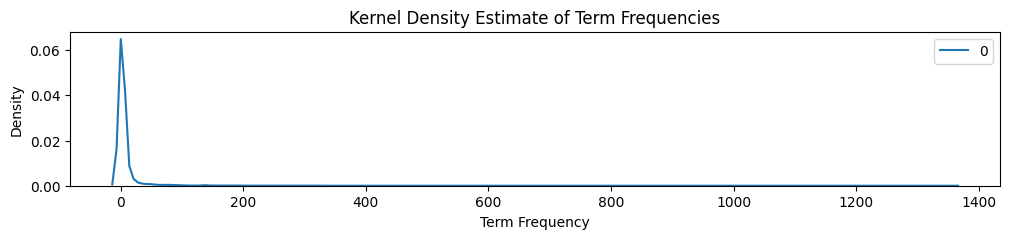

In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

term_frequencies = []
for j in range(0, X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:, j].toarray()))

term_frequencies = np.asarray(term_frequencies)

plt.figure(figsize=(12, 2))
sns.kdeplot(term_frequencies, bw_adjust=0.5)

plt.title("Kernel Density Estimate of Term Frequencies")
plt.xlabel("Term Frequency")
plt.ylabel("Density")
plt.show()


#### Different Plot Ways for term_frequencies

In [48]:
import matplotlib.pyplot as plt
import numpy as np

term_frequencies = []
for j in range(0, X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:, j].toarray()))

term_frequencies = np.asarray(term_frequencies)


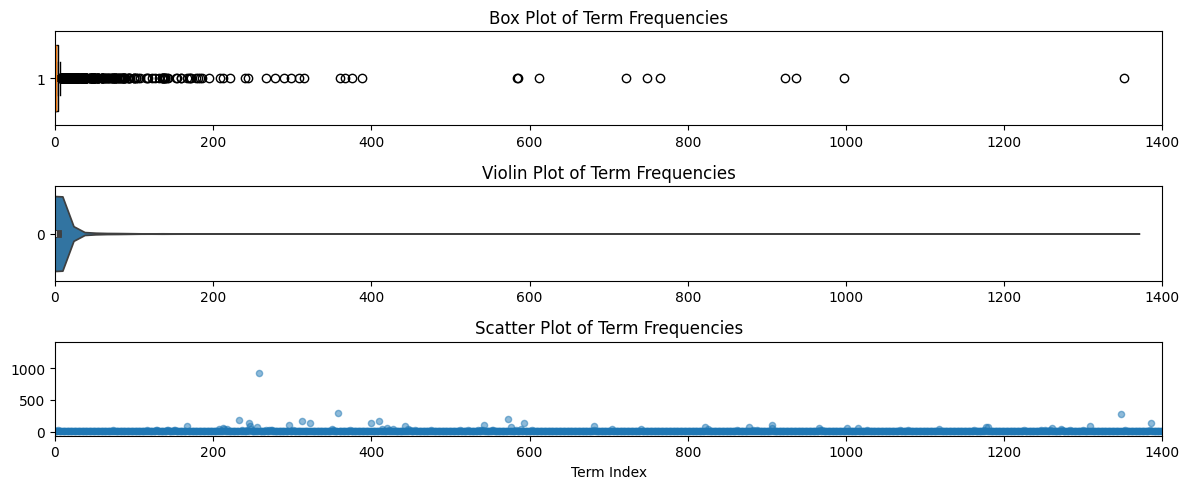

In [49]:
fig, ax = plt.subplots(3, 1, figsize=(12, 5))

plt.subplot(311)
plt.boxplot(term_frequencies, vert=False, widths=0.7)
plt.title("Box Plot of Term Frequencies")

plt.subplot(312)
sns.violinplot(data=term_frequencies, orient='h')
plt.title("Violin Plot of Term Frequencies")

plt.subplot(313)
plt.scatter(range(len(term_frequencies)), term_frequencies, alpha=0.5, s=20)
plt.title("Scatter Plot of Term Frequencies")
plt.xlabel("Term Index")
for a in ax:
    a.set_xlim(0, 1400)

plt.tight_layout()
plt.show()

### TF-IDF

In [50]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

# Calculate TF-IDF
tfidfVectorizer = TfidfVectorizer()
tfidfVectorizer.fit(X.comment)

tfidf_matrix = tfidfVectorizer.transform(X.comment)
tfidfVectorizer.get_feature_names_out()
tf_idf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidfVectorizer.get_feature_names_out())
tf_idf

00  000  045   07   10  100  10m   11  11th   12  ...  yours  yourself  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...       ...   
1494  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1495  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1496  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1497  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1498  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
0       0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1       0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
2       0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
3       0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
4       0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1494    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1495    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1496    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1497    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1498    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  

[1499 rows x 3730 columns]

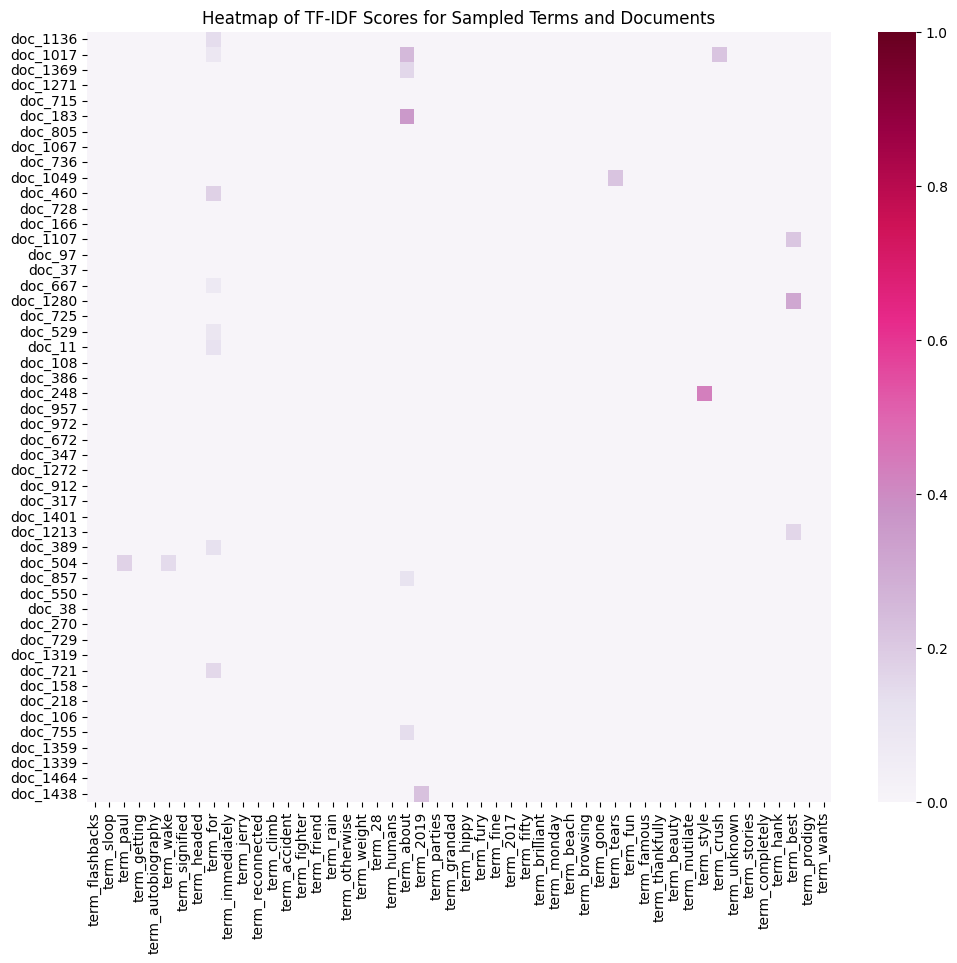

In [51]:
# Sample for Visualization
sampled_docs_indices = np.random.choice(range(tf_idf.shape[0]), size=50, replace=False)
sampled_terms_indices = np.random.choice(range(tf_idf.shape[1]), size=50, replace=False)

plot_x = ["term_" + str(i) for i in tf_idf.columns[sampled_terms_indices]]
plot_y = ["doc_" + str(i) for i in sampled_docs_indices]
plot_z = tf_idf.iloc[sampled_docs_indices, sampled_terms_indices].values
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

# Plot
plt.subplots(figsize=(12, 10))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=False)
plt.title("Heatmap of TF-IDF Scores for Sampled Terms and Documents")
plt.show()


### Naive Bayes Classfier

In [52]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(tf_idf, X['sentiment'], test_size=0.3, random_state=23)
# Check shape
print(X_train.shape)
print(X_test.shape)

(1049, 3730)
(450, 3730)


In [53]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Use MultinomialNB model for more than 1 class
nb_classifier_tf = MultinomialNB()
nb_classifier_tf.fit(X_train, y_train)

y_pred = nb_classifier_tf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.9044444444444445

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8920    0.9331    0.9121       239
not nostalgia     0.9200    0.8720    0.8954       211

     accuracy                         0.9044       450
    macro avg     0.9060    0.9025    0.9037       450
 weighted avg     0.9051    0.9044    0.9042       450



#### **Comment on the differences**
Summary of Origin(TDM) vs. TF-IDF in Naive Bayes Classification:
Overall Accuracy: TF-IDF (90.44%) slightly outperforms Origin (89.33%) by +1.11%.

"Nostalgia" Category:
Precision: TF-IDF +2.04% (fewer false positives).
Recall: Origin +0.41% (captures more true cases).
F1-Score: TF-IDF +0.89%.

"Not Nostalgia" Category:
Precision: Origin +0.23%.
Recall: TF-IDF +2.84%.
F1-Score: TF-IDF +1.42%.
Average Scores: TF-IDF shows higher macro and weighted averages (+1.1%).

Conclusion: TF-IDF generally outperforms Origin due to better feature weighting, though both methods perform well.

## Task 4

### Memory Management
Use batch processing to reduce memory usage

In [ ]:
# Origin
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

# Improvement
def batch_generator(X, batch_size=1000):
    for i in range(0, len(X), batch_size):
        yield X[i:i + batch_size]

count_vect = CountVectorizer()
X_counts = None

for batch in batch_generator(X.text, batch_size=1000):
    X_counts_batch = count_vect.fit_transform(batch)
    if X_counts is None:
        X_counts = X_counts_batch
    else:
        X_counts = vstack([X_counts, X_counts_batch])

### Dimensionality Reduction
Use IncrementalPCA instead of PCA (computationally & memory efficiency)

In [ ]:
from sklearn.decomposition import IncrementalPCA
ipca = IncrementalPCA(n_components=2, batch_size=100)
X_ipca = ipca.fit_transform(tdm_df.values)

### Tokenize
Use consistent code 


maybe can use NLTK tokenizer

In [ ]:
# 1.
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

# 2.
count_vect = CountVectorizer()
analyzer = count_vect.build_analyzer()
analyzer("text")

# 3. Extra: NLTK, for deeper and flexible language processing

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

def tokenize(text):
    pattern = re.compile(r'[^\w\s]')
    text = pattern.sub('', text.lower())
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    
    return [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

X['tokens'] = X['text'].apply(tokenize)